# 도금공정 데이터 셋

## 데이터 설명

|**변수 이름**|**내용**|**데이터 타입**|**독립변수/종속변수 여부**|**데이터 개수**|**결측치 여부**
|:----:|:----:|:----:|:----:|:----:|:----:|
|pH|도금욕 설비 내 공정 pH 측정 값|int|독립변수|50,904|Non-null
|Temp|도금욕 설비 내 공정 온도 측정 값|float|독립변수|50,904|Non-null
|Current|도금욕 설비 내 공정 전류 측정 값|float|독립변수|50,904|Non-null
|Voltage|도금욕 설비 내 공정 전압 측정 값|float|독립변수|50,904|Non-null
|LoT|LoT 추적을 위해 각 LoT별로 부여|float|종속변수|50,904|Non-null

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn import tree
import autokeras as ak
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
import tensorflow
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

## 현재위치와 파일이름을 각각 root_dir, f_lists에 저장

In [4]:
root_dir = os.getcwd()
f_lists = os.listdir(root_dir)
print("File Lists : ", f_lists)

File Lists :  ['.ipynb_checkpoints', 'Code.ipynb', 'Error Lot list.csv', 'Final_Code.ipynb', 'kemp-abh-sensor-2021.09.06.csv', 'kemp-abh-sensor-2021.09.07.csv', 'kemp-abh-sensor-2021.09.08.csv', 'kemp-abh-sensor-2021.09.09.csv', 'kemp-abh-sensor-2021.09.10.csv', 'kemp-abh-sensor-2021.09.13.csv', 'kemp-abh-sensor-2021.09.14.csv', 'kemp-abh-sensor-2021.09.15.csv', 'kemp-abh-sensor-2021.09.16.csv', 'kemp-abh-sensor-2021.09.17.csv', 'kemp-abh-sensor-2021.09.23.csv', 'kemp-abh-sensor-2021.09.24.csv', 'kemp-abh-sensor-2021.09.27.csv', 'kemp-abh-sensor-2021.09.28.csv', 'kemp-abh-sensor-2021.09.29.csv', 'kemp-abh-sensor-2021.09.30.csv', 'kemp-abh-sensor-2021.10.01.csv', 'kemp-abh-sensor-2021.10.05.csv', 'kemp-abh-sensor-2021.10.06.csv', 'kemp-abh-sensor-2021.10.07.csv', 'kemp-abh-sensor-2021.10.08.csv', 'kemp-abh-sensor-2021.10.12.csv', 'kemp-abh-sensor-2021.10.13.csv', 'kemp-abh-sensor-2021.10.14.csv', 'kemp-abh-sensor-2021.10.15.csv', 'kemp-abh-sensor-2021.10.18.csv', 'kemp-abh-sensor-2021.1

## f_lists안에 뒷 이름이 .csv로 끝나는 파일인 경우 new_file_lists에 저장

In [6]:
new_file_lists = [f for f in f_lists if f.endswith('.csv')]
print("File Lists : ", new_file_lists)

File Lists :  ['Error Lot list.csv', 'kemp-abh-sensor-2021.09.06.csv', 'kemp-abh-sensor-2021.09.07.csv', 'kemp-abh-sensor-2021.09.08.csv', 'kemp-abh-sensor-2021.09.09.csv', 'kemp-abh-sensor-2021.09.10.csv', 'kemp-abh-sensor-2021.09.13.csv', 'kemp-abh-sensor-2021.09.14.csv', 'kemp-abh-sensor-2021.09.15.csv', 'kemp-abh-sensor-2021.09.16.csv', 'kemp-abh-sensor-2021.09.17.csv', 'kemp-abh-sensor-2021.09.23.csv', 'kemp-abh-sensor-2021.09.24.csv', 'kemp-abh-sensor-2021.09.27.csv', 'kemp-abh-sensor-2021.09.28.csv', 'kemp-abh-sensor-2021.09.29.csv', 'kemp-abh-sensor-2021.09.30.csv', 'kemp-abh-sensor-2021.10.01.csv', 'kemp-abh-sensor-2021.10.05.csv', 'kemp-abh-sensor-2021.10.06.csv', 'kemp-abh-sensor-2021.10.07.csv', 'kemp-abh-sensor-2021.10.08.csv', 'kemp-abh-sensor-2021.10.12.csv', 'kemp-abh-sensor-2021.10.13.csv', 'kemp-abh-sensor-2021.10.14.csv', 'kemp-abh-sensor-2021.10.15.csv', 'kemp-abh-sensor-2021.10.18.csv', 'kemp-abh-sensor-2021.10.19.csv', 'kemp-abh-sensor-2021.10.20.csv', 'kemp-abh-s

## data_lists : 'Error Lot list.csv'파일을 제외한 나머지 파일을 저장    

In [7]:
data_lists = new_file_lists[1:]
error_list = new_file_lists[0]
print("Data Lists : ", data_lists)
print("Error Data List : ", error_list)

Data Lists :  ['kemp-abh-sensor-2021.09.06.csv', 'kemp-abh-sensor-2021.09.07.csv', 'kemp-abh-sensor-2021.09.08.csv', 'kemp-abh-sensor-2021.09.09.csv', 'kemp-abh-sensor-2021.09.10.csv', 'kemp-abh-sensor-2021.09.13.csv', 'kemp-abh-sensor-2021.09.14.csv', 'kemp-abh-sensor-2021.09.15.csv', 'kemp-abh-sensor-2021.09.16.csv', 'kemp-abh-sensor-2021.09.17.csv', 'kemp-abh-sensor-2021.09.23.csv', 'kemp-abh-sensor-2021.09.24.csv', 'kemp-abh-sensor-2021.09.27.csv', 'kemp-abh-sensor-2021.09.28.csv', 'kemp-abh-sensor-2021.09.29.csv', 'kemp-abh-sensor-2021.09.30.csv', 'kemp-abh-sensor-2021.10.01.csv', 'kemp-abh-sensor-2021.10.05.csv', 'kemp-abh-sensor-2021.10.06.csv', 'kemp-abh-sensor-2021.10.07.csv', 'kemp-abh-sensor-2021.10.08.csv', 'kemp-abh-sensor-2021.10.12.csv', 'kemp-abh-sensor-2021.10.13.csv', 'kemp-abh-sensor-2021.10.14.csv', 'kemp-abh-sensor-2021.10.15.csv', 'kemp-abh-sensor-2021.10.18.csv', 'kemp-abh-sensor-2021.10.19.csv', 'kemp-abh-sensor-2021.10.20.csv', 'kemp-abh-sensor-2021.10.21.csv',

## csv 파일 형태의 데이터를 가져오기 위한 사용자 정의 함수 생성
csv_read_()

In [8]:
def csv_read_(data_dir, data_list):
 tmp = pd.read_csv(os.path.join(data_dir, data_list), sep=',', encoding='utf-8')
 y, m, d =map(int, data_list.split('-')[-1].split('.')[:-1])
 time = tmp['Time']
 tmp['DTime'] ='-'.join(data_list.split('-')[-1].split('.')[:-1])
 ctime = time.apply(lambda _ : _.replace(u'오후', 'PM').replace(u'오전', 'AM'))
 n_time = ctime.apply(lambda _ : datetime.datetime.strptime(_, "%p %I:%M:%S.%f"))
 newtime = n_time.apply(lambda _ : _.replace(year=y, month=m, day=d))
 tmp['Time'] = newtime
 return tmp

## 앞서 생성한 사용자 정의 함수 사용을 통해 data_lists를 이용하여 데이터를 불러온다.

In [9]:
dd = csv_read_(root_dir, data_lists[0])
for i in range(1, len(data_lists)):
    dd = pd.merge(dd, csv_read_(root_dir, data_lists[i]), how = 'outer')

## Index 열은 불필요하므로 drop 함수를 통해 Index 열 제거
이후 Index열은 Time 열 데이터로 재지정

In [10]:
dd = dd.drop('Index', axis = 1)
dd

,Lot,Time,pH,Temp,Current,Voltage,DTime
0,1,2021-09-06 16:27:17.000,1.51,23.72,3.03,4.52,2021-09-06
1,1,2021-09-06 16:27:22.000,2.84,27.92,3.11,3.43,2021-09-06
2,1,2021-09-06 16:27:27.000,1.78,25.44,3.98,4.58,2021-09-06
3,1,2021-09-06 16:27:32.000,2.80,21.50,3.45,3.10,2021-09-06
4,1,2021-09-06 16:27:37.000,2.63,27.24,4.47,3.26,2021-09-06
...,...,...,...,...,...,...,...
50089,22,2021-10-27 18:34:42.700,2.32,27.73,3.93,3.77,2021-10-27
50090,22,2021-10-27 18:34:47.700,2.15,21.23,3.44,4.09,2021-10-27
50091,22,2021-10-27 18:34:52.700,2.62,24.21,4.39,3.84,2021-10-27
50092,22,2021-10-27 18:34:57.700,1.83,23.41,4.32,3.65,2021-10-27


## Time 열을 데이터의 인덱스로 지정

In [11]:
dd = dd.set_index('Time')
dd

,Lot,pH,Temp,Current,Voltage,DTime
Time,,,,,,
2021-09-06 16:27:17.000,1,1.51,23.72,3.03,4.52,2021-09-06
2021-09-06 16:27:22.000,1,2.84,27.92,3.11,3.43,2021-09-06
2021-09-06 16:27:27.000,1,1.78,25.44,3.98,4.58,2021-09-06
2021-09-06 16:27:32.000,1,2.80,21.50,3.45,3.10,2021-09-06
2021-09-06 16:27:37.000,1,2.63,27.24,4.47,3.26,2021-09-06
...,...,...,...,...,...,...
2021-10-27 18:34:42.700,22,2.32,27.73,3.93,3.77,2021-10-27
2021-10-27 18:34:47.700,22,2.15,21.23,3.44,4.09,2021-10-27
2021-10-27 18:34:52.700,22,2.62,24.21,4.39,3.84,2021-10-27


## 원본 데이터의 변형 방지를 위해 원본 데이터를 copy 한뒤 dedicated_data 변수에 저장

In [12]:
dedicated_data = dd.copy()
dedicated_data

,Lot,pH,Temp,Current,Voltage,DTime
Time,,,,,,
2021-09-06 16:27:17.000,1,1.51,23.72,3.03,4.52,2021-09-06
2021-09-06 16:27:22.000,1,2.84,27.92,3.11,3.43,2021-09-06
2021-09-06 16:27:27.000,1,1.78,25.44,3.98,4.58,2021-09-06
2021-09-06 16:27:32.000,1,2.80,21.50,3.45,3.10,2021-09-06
2021-09-06 16:27:37.000,1,2.63,27.24,4.47,3.26,2021-09-06
...,...,...,...,...,...,...
2021-10-27 18:34:42.700,22,2.32,27.73,3.93,3.77,2021-10-27
2021-10-27 18:34:47.700,22,2.15,21.23,3.44,4.09,2021-10-27
2021-10-27 18:34:52.700,22,2.62,24.21,4.39,3.84,2021-10-27


## dedicated_data 열 출력

In [13]:
dedicated_data.columns

Index(['Lot', 'pH', 'Temp', 'Current', 'Voltage', 'DTime'], dtype='object')

## dedicated_data 요약통계량 출력

In [14]:
dedicated_data.describe()

,Lot,pH,Temp,Current,Voltage
count,50094.000000,50094.000000,50094.000000,50094.000000,50094.000000
mean,11.500000,2.285757,24.480888,3.730691,3.976234
std,6.344352,0.497902,1.898774,0.454982,0.603858
min,1.000000,1.510000,17.020000,1.520000,1.010000
25%,6.000000,1.890000,22.960000,3.380000,3.500000
50%,11.500000,2.260000,24.480000,3.740000,3.990000
75%,17.000000,2.640000,26.010000,4.100000,4.480000
max,22.000000,5.480000,27.990000,4.490000,4.990000


## dedicated_data 행, 열 출력

In [15]:
dedicated_data.shape

(50094, 6)

## dedicated_data 정보 출력

In [16]:
dedicated_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50094 entries, 2021-09-06 16:27:17 to 2021-10-27 18:35:02.700000
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Lot      50094 non-null  int64  
 1   pH       50094 non-null  float64
 2   Temp     50094 non-null  float64
 3   Current  50094 non-null  float64
 4   Voltage  50094 non-null  float64
 5   DTime    50094 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 2.7+ MB


## dedicated_data 결측치 확인 : 이상없음

In [17]:
dedicated_data.isna().sum()

Lot        0
pH         0
Temp       0
Current    0
Voltage    0
DTime      0
dtype: int64

## dedicated_data 히스토그램 출력
pH의 경우 약 2.1을 기준으로 데이터가 분포한 것을 확인할 수 있으며, Temp의 경
우 약 24를 기준으로, Current의 경우 약 3.7을 기준으로, Voltage의 경우 약 4를 
기준으로 데이터가 분포한 것을 확인할 수 있다.

array([[<AxesSubplot:title={'center':'Lot'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'Temp'}>,
        <AxesSubplot:title={'center':'Current'}>],
       [<AxesSubplot:title={'center':'Voltage'}>, <AxesSubplot:>]],
      dtype=object)

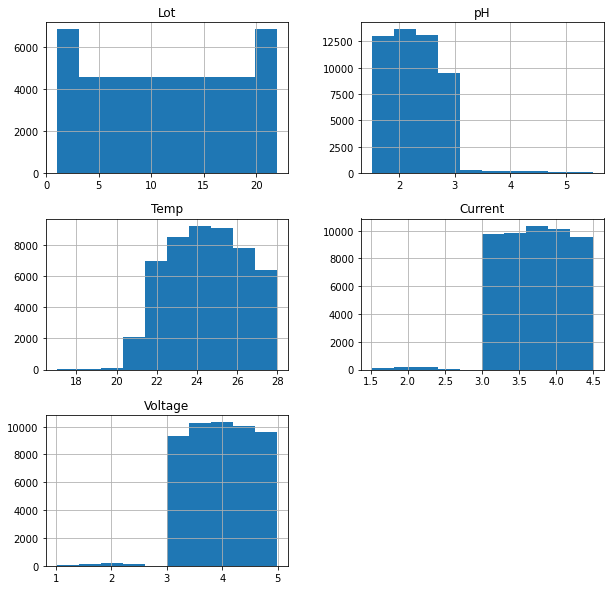

In [18]:
dedicated_data.hist(figsize = (10, 10))

## 상관분석(Pearson)
데이터 상관관계를 heatmap으로 시각화하여 분석한 결과 현재 데이터들의 관계를 통해서는 모두 **매우 낮은 상관관계**를 보이는 것을 알 수 있다.

<AxesSubplot:>

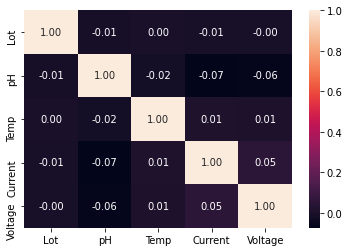

In [73]:
correlation = dedicated_data.corr(method='pearson')
sns.heatmap(correlation, annot = True, fmt = '.2f')

## Lot List 추출
- DataFrame의 컬럼 명과 unique() 함수를 이용하면 해당 컬럼에 있는 값의 유일 값
들을 뽑을 수 있다.
- DataFrame 내 Lot의 리스트를 뽑기 위해 Lot 컬럼을 사용한다
- unique 값을 통해 list를 만들어 저장하였을 때, 해당 값을 print() 함수를 통해 출력
시키고, list의 길이를 print(len(list)) 함수를 통해 출력시킨다.

In [22]:
lot_lists = dedicated_data['Lot'].unique()
print(lot_lists)
print(len(lot_lists))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
22


## Data List 추출
DataFrame의 컬럼 명과 unique() 함수를 이용하면 해당 컬럼에 있는 값의 유일 값
들을 뽑을 수 있다.

In [23]:
d_lists = dedicated_data['DTime'].unique()
print(d_lists)
print(len(d_lists))

['2021-09-06' '2021-09-07' '2021-09-08' '2021-09-09' '2021-09-10'
 '2021-09-13' '2021-09-14' '2021-09-15' '2021-09-16' '2021-09-17'
 '2021-09-23' '2021-09-24' '2021-09-27' '2021-09-28' '2021-09-29'
 '2021-09-30' '2021-10-01' '2021-10-05' '2021-10-06' '2021-10-07'
 '2021-10-08' '2021-10-12' '2021-10-13' '2021-10-14' '2021-10-15'
 '2021-10-18' '2021-10-19' '2021-10-20' '2021-10-21' '2021-10-22'
 '2021-10-25' '2021-10-26' '2021-10-27']
33


## Error Data 읽기
- root_dir : 'C:\\Users\\shk97\\스마트팩토리\\data'</br>
- error_list : 'Error Lot list.csv'
- root_dir + error_list = 'C:\\Users\\shk97\\스마트팩토리\\data\\Error Lot list.csv'

In [26]:
error = pd.read_csv(os.path.join(root_dir, error_list), sep = ',', encoding = 'utf-8')
error

,Index,Date,LoT
0,1,2021-09-06,NaN
1,2,2021-09-07,2.0
2,3,2021-09-08,NaN
3,4,2021-09-09,8.0
4,5,2021-09-10,NaN
5,6,2021-09-13,22.0
6,7,2021-09-14,NaN
7,8,2021-09-15,NaN
8,9,2021-09-16,3.0
9,10,2021-09-17,16.0


## Error LoT DataFrame에서 결측치를 가진 행을 제거한다.

In [27]:
error_drop = error.dropna()
error_drop

,Index,Date,LoT
1,2,2021-09-07,2.0
3,4,2021-09-09,8.0
5,6,2021-09-13,22.0
8,9,2021-09-16,3.0
9,10,2021-09-17,16.0
13,14,2021-09-28,8.0
15,16,2021-09-30,13.0
17,18,2021-10-05,18.0
20,21,2021-10-08,19.0
22,23,2021-10-13,10.0


In [28]:
lot_error_lists = error_drop['LoT'].unique()
d_error_lists = error_drop['Date'].unique()
print("Unique LoT List : ", lot_error_lists)
print("Unique Date List : ", d_error_lists)

Unique LoT List :  [ 2.  8. 22.  3. 16. 13. 18. 19. 10.]
Unique Date List :  ['2021-09-07' '2021-09-09' '2021-09-13' '2021-09-16' '2021-09-17'
 '2021-09-28' '2021-09-30' '2021-10-05' '2021-10-08' '2021-10-13'
 '2021-10-14' '2021-10-22' '2021-10-25']


##  X_data : 각각 열 이름이 'pH', 'Temp', 'Current', 'Voltage', 'QC'인 빈 데이터프레임 생성

In [147]:
X_data = pd.DataFrame(columns={'pH','Temp','Current', 'Voltage', 'QC'})

## 두 개의 데이터프레임에서 필요한 부분만 합치는 코드
error_drop 데이터프레임에 존재하는 에러데이터들은 불량인 데이터를 의미하므로 X_data의 종속변수에 해당하는 'QC'열에 error_drop 데이터가 포함되어 있을경우 0(불량)을 대입하고 그렇지 않을경우 1을 대입한다.

In [150]:
for d in d_lists: # 연도별 데이터 리스트를 하나씩 불러옴
 for lot in lot_lists: # Lot 데이터 리스트를 하나씩 불러옴
    
     tmp = dd[(dd['DTime']==d)&(dd['Lot']==lot)] # dd 데이터프레임에 연도가 d이고 Lot가 lot인 데이터를 tmp 변수에 저장
     tmp = tmp[['pH', 'Temp','Current', 'Voltage']] # tmp 데이터프레임에서 'pH', 'Temp', 'Current', 'Voltage'열만 추출
     
     # 에러 데이터(error_drop)가 존재할경우 len_error는 0보다 큰 값을 갖게 됨
     error_df = error_drop[(error_drop['Date']==d)&((error_drop['LoT']==lot))] # 결측치가 제거된 에러 데이터에 연도가 d이고 Lot가 lot인 데이터를 error_df에 저장
     len_error = len(error_df) # error_df 길이를 len_error 변수에 저장
    
     if len_error > 0: # 만약 길이가 0보다 클 경우
         trr = np.full((tmp['pH'].shape), 0) # 크기가 tmp['pH'].shape(50,094)이고 지정 값을 0(불량)으로 입력
            
     else: # 그렇지 않은 경우
         trr = np.full((tmp['pH'].shape), 1) # 크기가 tmp['pH'].shape(50,094)이고 지정 값을 1으로 입력
     tmp['QC'] = trr # tmp['QC']에 trr 대입
     X_data = X_data.append(tmp) # X_datadp tmp 데이터프레임 대입

X_data = X_data.apply(pd.to_numeric) # X_data에 모든 값의 타입을 numeric으로 변경

In [155]:
X_data = X_data[['Current', 'pH', 'Temp', 'Voltage', 'QC']]

## X_data 요약통계량 산출

In [156]:
X_data.describe()

,Current,pH,Temp,Voltage,QC
count,50094.000000,50094.000000,50094.000000,50094.000000,50094.000000
mean,3.730691,2.285757,24.480888,3.976234,0.982094
std,0.454982,0.497902,1.898774,0.603858,0.132612
min,1.520000,1.510000,17.020000,1.010000,0.000000
25%,3.380000,1.890000,22.960000,3.500000,1.000000
50%,3.740000,2.260000,24.480000,3.990000,1.000000
75%,4.100000,2.640000,26.010000,4.480000,1.000000
max,4.490000,5.480000,27.990000,4.990000,1.000000


## X_data 상관관계 heatmap 시각화

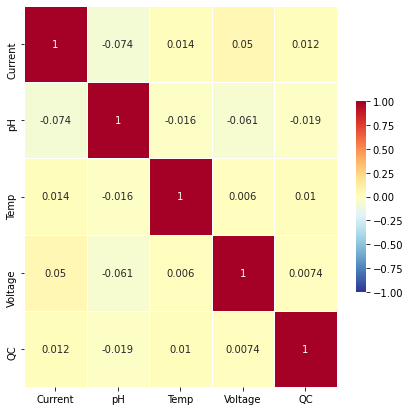

In [161]:
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(X_data.corr(),
            cmap='RdYlBu_r',
            annot = True,
            linewidths=0.5,
            cbar_kws={"shrink":.5},
            vmin=-1, vmax=1)
plt.show()

## Test / Train set 분리 
- Train set : 80%
- Test set : 20%

In [162]:
train_data, test_data = train_test_split(X_data, test_size=0.2)

# Autokeras StructuredDataRegressor 학습
## Parameter 설명
overwrite : 기존에 진행한 모델이 있는 경우 덮어씌워서 학습을 진행핼 때 사용</br>
max_trials : 
- 해당 모델을 최대 몇 번 만들어서 진행할 것인지를 결정하는 인자</br>
- max_trials에 도달하기 전에 검색이 완료될수도 있음</br>

verbose : 함수 수행시 발생하는 상세한 정보들을 표준 출력으로 내보내는 인자</br>
① 0 : 아무것도 출력하지 않음</br>
② 1 : 자세하게 출력</br>
③ 2 : 함축적인 정보만 출력</br>

epoch : 전체 데이터셋을 학습한 횟수를 의미</br>

In [175]:
is_training = True
if is_training:
    reg = ak.StructuredDataRegressor(
    overwrite=True, max_trials=5 # 덮어쓰기, 최대시도횟수 5번
)
    reg.fit(train_data[['pH','Temp','Current', 'Voltage']], train_data[['QC']], verbose=0, epochs=7) # 모델 학습
    model = reg.export_model()
else:
    model = tensorflow.keras.models.load_model("structured_data_regressor/best_model", custom_objects=ak.CUSTOM_OBJECTS) # 모델을 불러옴

INFO:tensorflow:Oracle triggered exit
Epoch 1/7
1253/1253 [==============================] - 2s 1ms/step - loss: 0.1190 - mean_squared_error: 0.1190
Epoch 2/7
1253/1253 [==============================] - 2s 1ms/step - loss: 0.0289 - mean_squared_error: 0.0289
Epoch 3/7
1253/1253 [==============================] - 2s 1ms/step - loss: 0.0185 - mean_squared_error: 0.0185
Epoch 4/7
1253/1253 [==============================] - 2s 1ms/step - loss: 0.0173 - mean_squared_error: 0.0173
Epoch 5/7
1253/1253 [==============================] - 2s 1ms/step - loss: 0.0173 - mean_squared_error: 0.0173
Epoch 6/7
1253/1253 [==============================] - 2s 1ms/step - loss: 0.0172 - mean_squared_error: 0.0172
Epoch 7/7
1253/1253 [==============================] - 2s 1ms/step - loss: 0.0173 - mean_squared_error: 0.0173
INFO:tensorflow:Assets written to: .\structured_data_regressor\best_model\assets


### Regression 모델 test_data set 평가
- 모델 평가 지표 : RMSE(Root Mean Square Error)

RMSE가 0.13으로 데이터셋의 Scale을 고려했을 때 매우 낮은 수치로 정확도가 매우 높다고 말할 수 있다 **즉 모델의 성능이 좋다고 볼 수 있다.**

In [206]:
ak_model_predicted = model.predict(test_data[['pH','Temp','Current','Voltage']])
print('AutoKeras Model Predict : ', ak_model_predicted)
rmse = sqrt(mean_squared_error(test_data['QC'], ak_model_predicted))
print('AutoKeras Model RMSE : ',rmse)

314/314 [==============================] - 0s 1ms/step
AutoKeras Model Predict :  [[0.9789104 ]
 [0.9806743 ]
 [0.98043036]
 ...
 [0.97997546]
 [0.9810603 ]
 [0.97931355]]
AutoKeras Model RMSE :  0.1375168291895648


### 모델의 분류성능평가 : Confusion Matrix(accuracy, recall, precision, f1 score)
혼동행렬을 통해 모델의 성능평가를 진행한 결과 모델의 분류 성능이 매우 좋은 것을 알 수 있으며, 특시 recall이 1.0으로 품질예측을 수행할 때 **불량(negative)을 불량으로 정확하게 예측하는 성능**이 매우 우수한 것을 확인할 수 있다.

In [207]:
y_test = test_data['QC']
y_pred = [round(y[0], 0) for y in ak_model_predicted]
print("accuracy = ", accuracy_score(y_test, y_pred))
print("recall = ", recall_score(y_test, y_pred))
print("precision = ", precision_score(y_test, y_pred))
print("f1 score = ", f1_score(y_test, y_pred))

accuracy =  0.9806367900988122
recall =  1.0
precision =  0.9806367900988122
f1 score =  0.9902237452126588


In [208]:
def get_confusion_matrix_values(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return(cm[0][0], cm[0][1], cm[1][0], cm[1][1])
TP, FP, FN, TN = get_confusion_matrix_values(y_test, y_pred)
print("TP : ", TP)
print("FP : ", FP)
print("FN : ", FN)
print("TN : ", TN)

TP :  0
FP :  194
FN :  0
TN :  9825


### Roc_curve 시각화

In [209]:
if (TP+FN) == 0:
 tpr_val = 0
else:
 tpr_val = TP / (TP+FN)
if (TN+FP) == 0:
 fpr_val = 0
else:
 fpr_val = TN / (TN+FP)
print(tpr_val, fpr_val)
tpr, fpr, _ = roc_curve(y_test, y_pred)
tpr[1] = tpr_val
fpr[1] = fpr_val
if len(tpr) < 3:
 tpr = np.append(tpr, 1)
 fpr = np.append(fpr, 1)
print(fpr, tpr)

0 0.9806367900988122
[0.         0.98063679 1.        ] [0. 0. 1.]


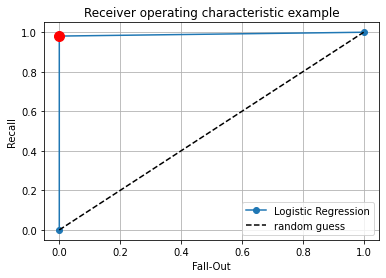

In [210]:
plt.plot(tpr, fpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([tpr_val], [fpr_val], 'ro', ms=10)
plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.grid()
plt.legend()
plt.show()

### Regression 모델 3D 시각화

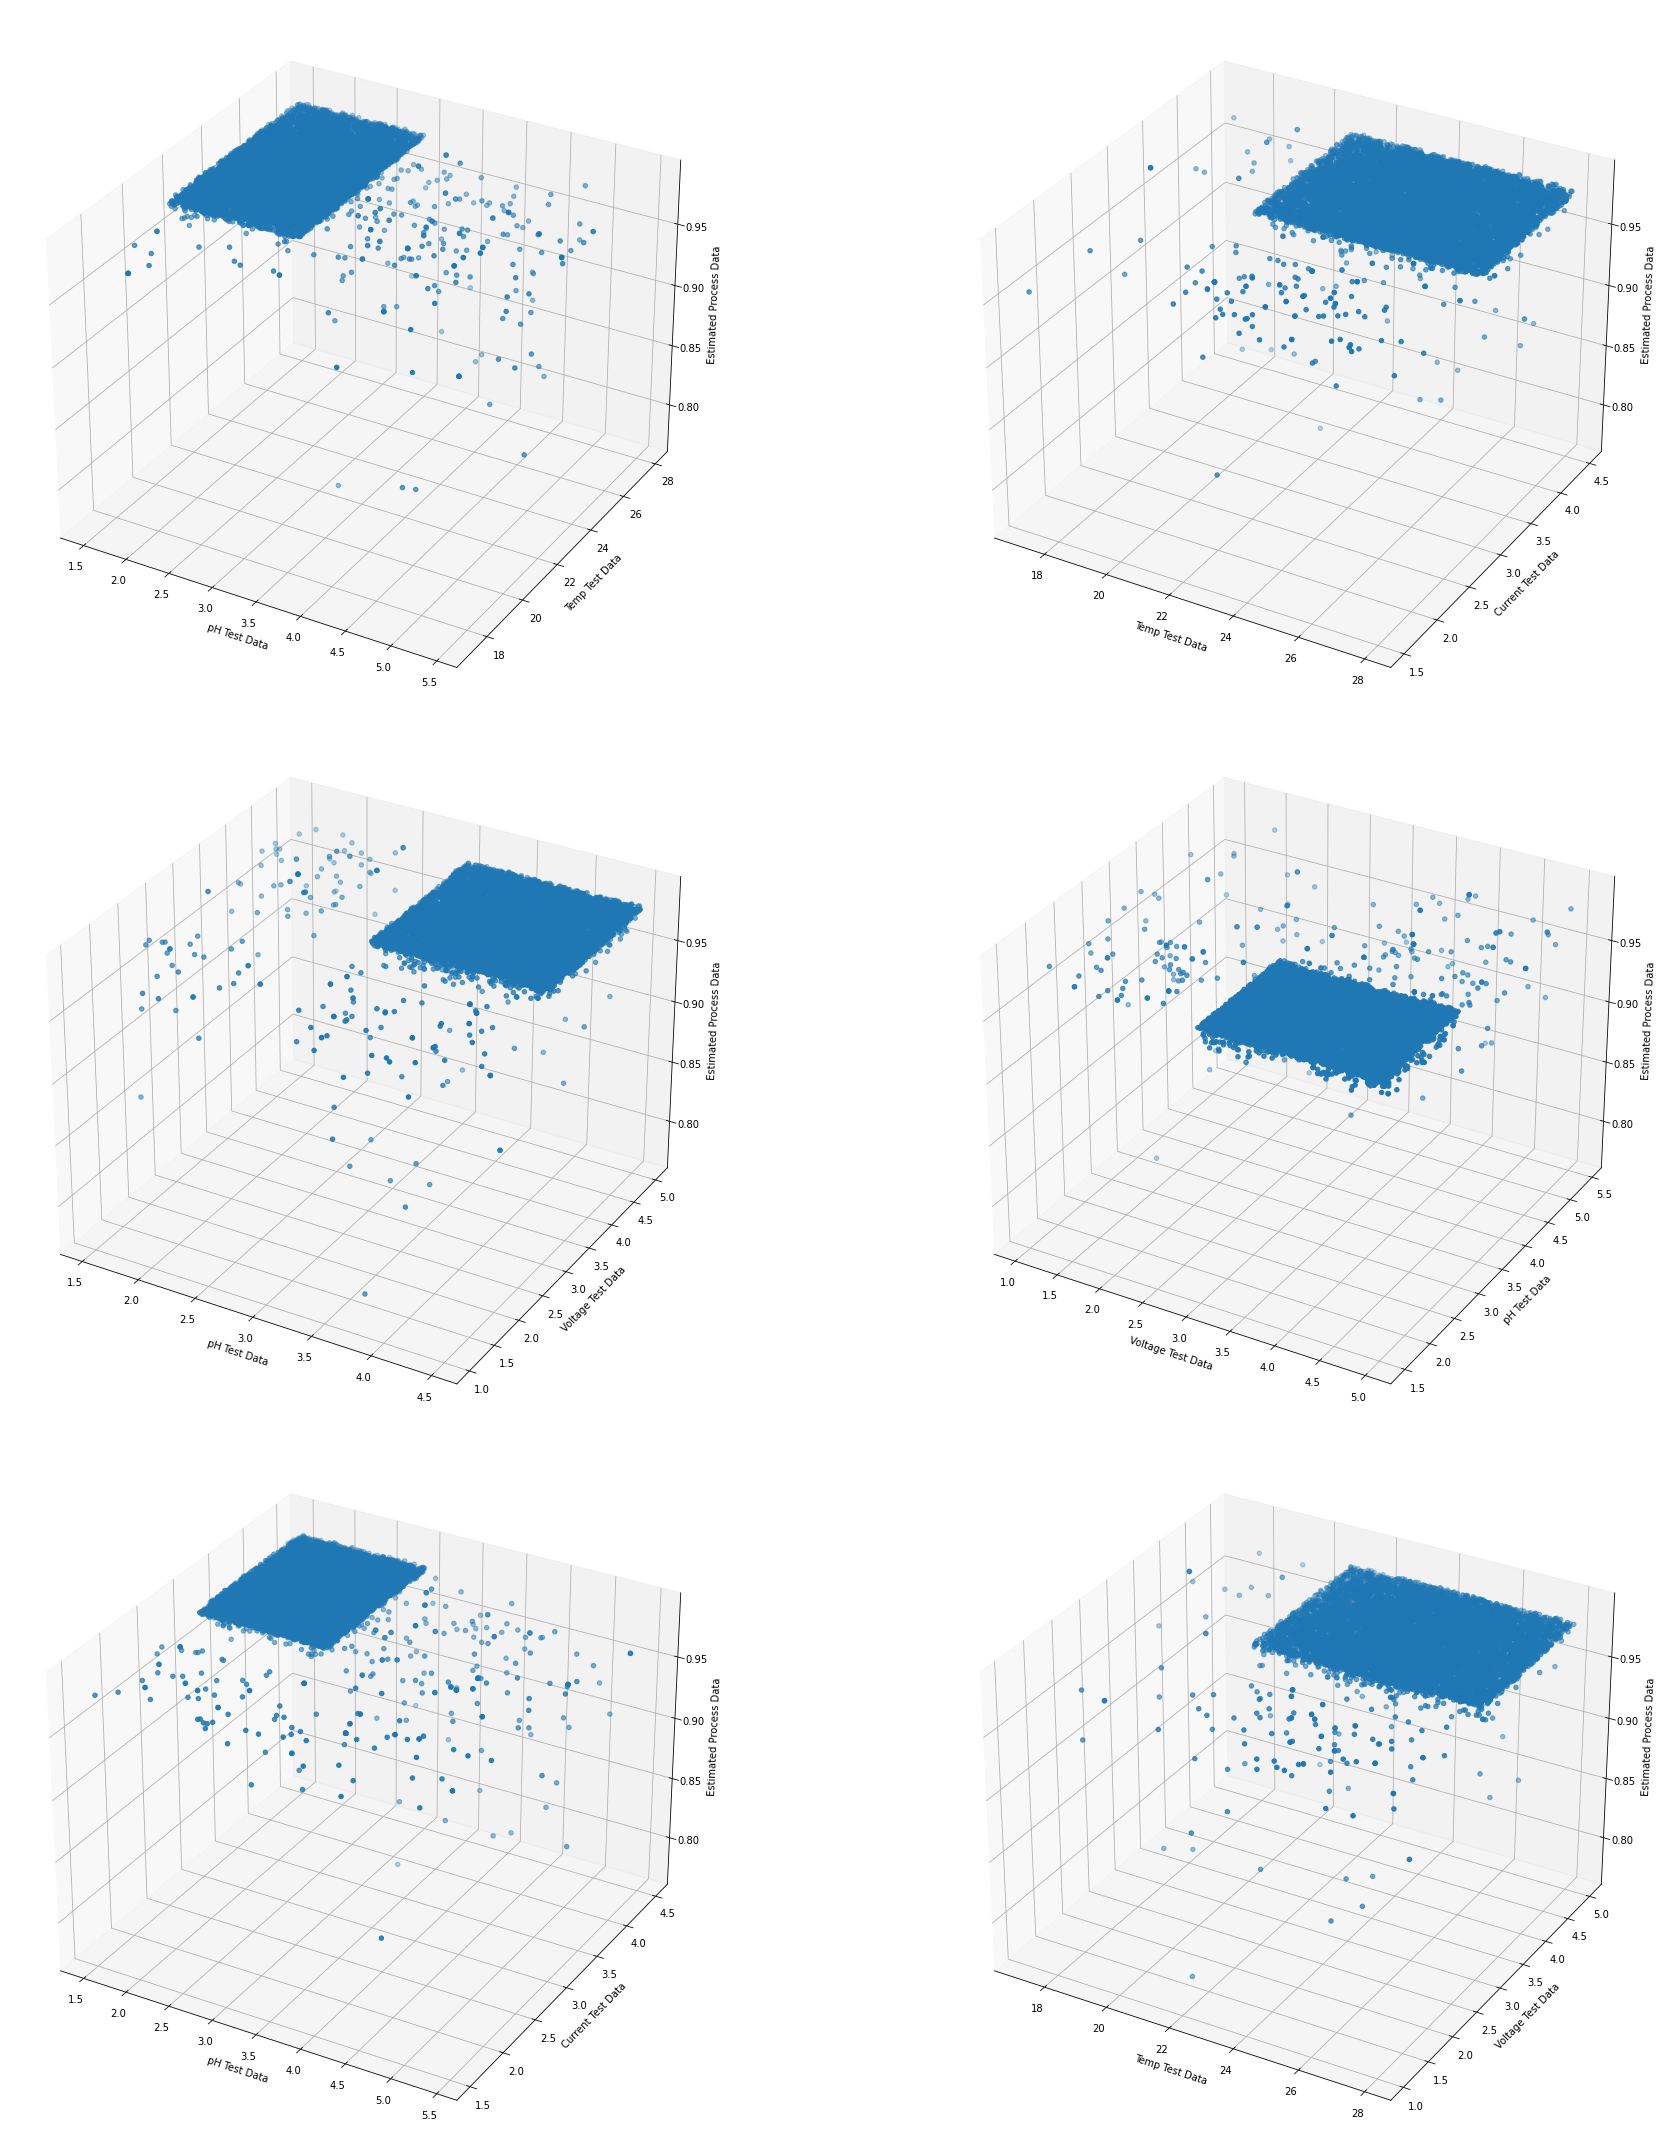

In [211]:
fig = plt.figure(figsize=(30, 30))
ax1 = fig.add_subplot(3,2,1, projection='3d')
ax1.scatter(test_data['pH'], test_data['Temp'], ak_model_predicted)
ax1.set_xlabel('pH Test Data')
ax1.set_ylabel('Temp Test Data')
ax1.set_zlabel('Estimated Process Data')
ax2 = fig.add_subplot(3,2,2, projection='3d')
ax2.scatter(test_data['Temp'], test_data['Current'], ak_model_predicted)
ax2.set_xlabel('Temp Test Data')
ax2.set_ylabel('Current Test Data')
ax2.set_zlabel('Estimated Process Data')
ax3 = fig.add_subplot(3,2,3, projection='3d')
ax3.scatter(test_data['Current'], test_data['Voltage'], ak_model_predicted)
ax3.set_xlabel('pH Test Data')
ax3.set_ylabel('Voltage Test Data')
ax3.set_zlabel('Estimated Process Data')
ax4 = fig.add_subplot(3,2,4, projection='3d')
ax4.scatter(test_data['Voltage'], test_data['pH'], ak_model_predicted)
ax4.set_xlabel('Voltage Test Data')
ax4.set_ylabel('pH Test Data')
ax4.set_zlabel('Estimated Process Data')
ax5 = fig.add_subplot(3,2,5, projection='3d')
ax5.scatter(test_data['pH'], test_data['Current'], ak_model_predicted)
ax5.set_xlabel('pH Test Data')
ax5.set_ylabel('Current Test Data')
ax5.set_zlabel('Estimated Process Data')
ax6 = fig.add_subplot(3,2,6, projection='3d')
ax6.scatter(test_data['Temp'], test_data['Voltage'], ak_model_predicted)
ax6.set_xlabel('Temp Test Data')
ax6.set_ylabel('Voltage Test Data')
ax6.set_zlabel('Estimated Process Data')
plt.tight_layout()
plt.show()

### 모델 요약 시각화
- Regression 모델을 summary() 함수를 통해  어떠한 layer가 생성되었는지 확인할 수 있음
- 각 layer의 output shape을 확인할 수 있음
- 학습되거나 학습하지 않는 parameter 개수를 확인할 수 있음

In [212]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 multi_category_encoding (Mu  (None, 4)                0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 4)                9         
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                160       
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056  

### Regression 모델 시각화

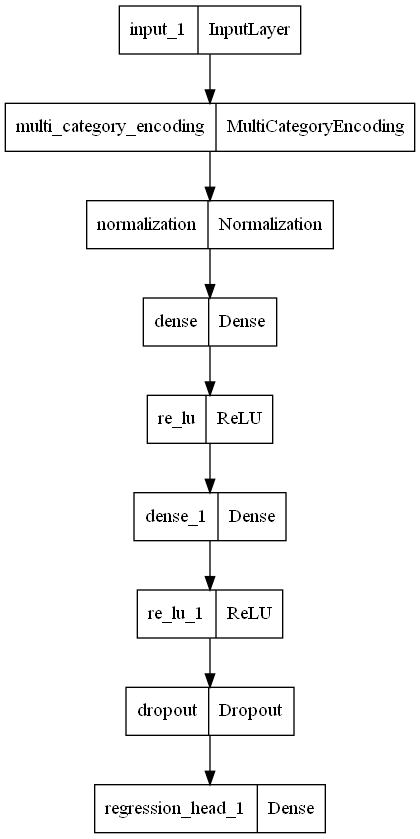

In [213]:
plot_model(model)

### Decision Tree 학습
- max_depth = 3

In [214]:
clf = tree.DecisionTreeRegressor(max_depth = 3)
clf.fit(X_data[['pH', 'Temp', 'Current', 'Voltage']], X_data[['QC']])

DecisionTreeRegressor(max_depth=3)

### Decision Tree(max_depth = 3) 모델 test_data set 평가
- 모델 평가 지표 : RMSE(Root Mean Square Error)

RMSE가 0.13으로 데이터셋의 Scale을 고려했을 때 매우 낮은 수치로 정확도가 매우 높다고 말할 수 있다 **즉 모델의 성능이 좋다고 볼 수 있다.**

In [215]:
predicted_data = clf.predict(test_data[['pH','Temp','Current', 'Voltage']])
print('Decision Tree Model Predict : ', predicted_data)
rmse = sqrt(mean_squared_error(test_data['QC'], predicted_data))
print('Decision Tree Model RMSE : ',rmse)

Decision Tree Model Predict :  [0.98334704 0.98334704 0.98334704 ... 0.98334704 0.98334704 0.98334704]
Decision Tree Model RMSE :  0.13745973654600555


### 모델의 분류성능평가 : Confusion Matrix(accuracy, recall, precision, f1 score)
혼동행렬을 통해 모델의 성능평가를 진행한 결과 모델의 분류 성능이 매우 좋은 것을 알 수 있으며, 특시 recall이 1.0으로 품질예측을 수행할 때 **불량(negative)을 불량으로 정확하게 예측하는 성능**이 매우 우수한 것을 확인할 수 있다.

In [216]:
y_test = test_data['QC'].values
y_pred = [round(y, 0) for y in predicted_data]
print("accuracy = ", accuracy_score(y_test, y_pred))
print("recall = ", recall_score(y_test, y_pred))
print("precision = ", precision_score(y_test, y_pred))
print("f1 score = ", f1_score(y_test, y_pred))

accuracy =  0.9806367900988122
recall =  1.0
precision =  0.9806367900988122
f1 score =  0.9902237452126588


In [217]:
TP, FP, FN, TN = get_confusion_matrix_values(y_test, y_pred)
print("TP : ", TP)
print("FP : ", FP)
print("FN : ", FN)
print("TN : ", TN)

TP :  0
FP :  194
FN :  0
TN :  9825


### Roc_curve 시각화

In [220]:
if (TP+FN) == 0:
 tpr_val = 0
else:
 tpr_val = TP / (TP+FN)
if (TN+FP) == 0:
 fpr_val = 0
else:
 fpr_val = TN / (TN+FP)
print(tpr_val, fpr_val)
tpr, fpr, _ = roc_curve(y_test, y_pred)
tpr[1] = tpr_val
fpr[1] = fpr_val
if len(tpr) < 3:
 tpr = np.append(tpr, 1)
 fpr = np.append(fpr, 1)
print(fpr, tpr)

0 0.9806367900988122
[0.         0.98063679 1.        ] [0. 0. 1.]


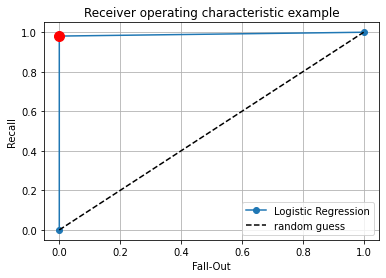

In [221]:
plt.plot(tpr, fpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([tpr_val], [fpr_val], 'ro', ms=10)
plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.grid()
plt.legend()
plt.show()

### Decision Tree(max_depth = 3) 모델 3D 시각화

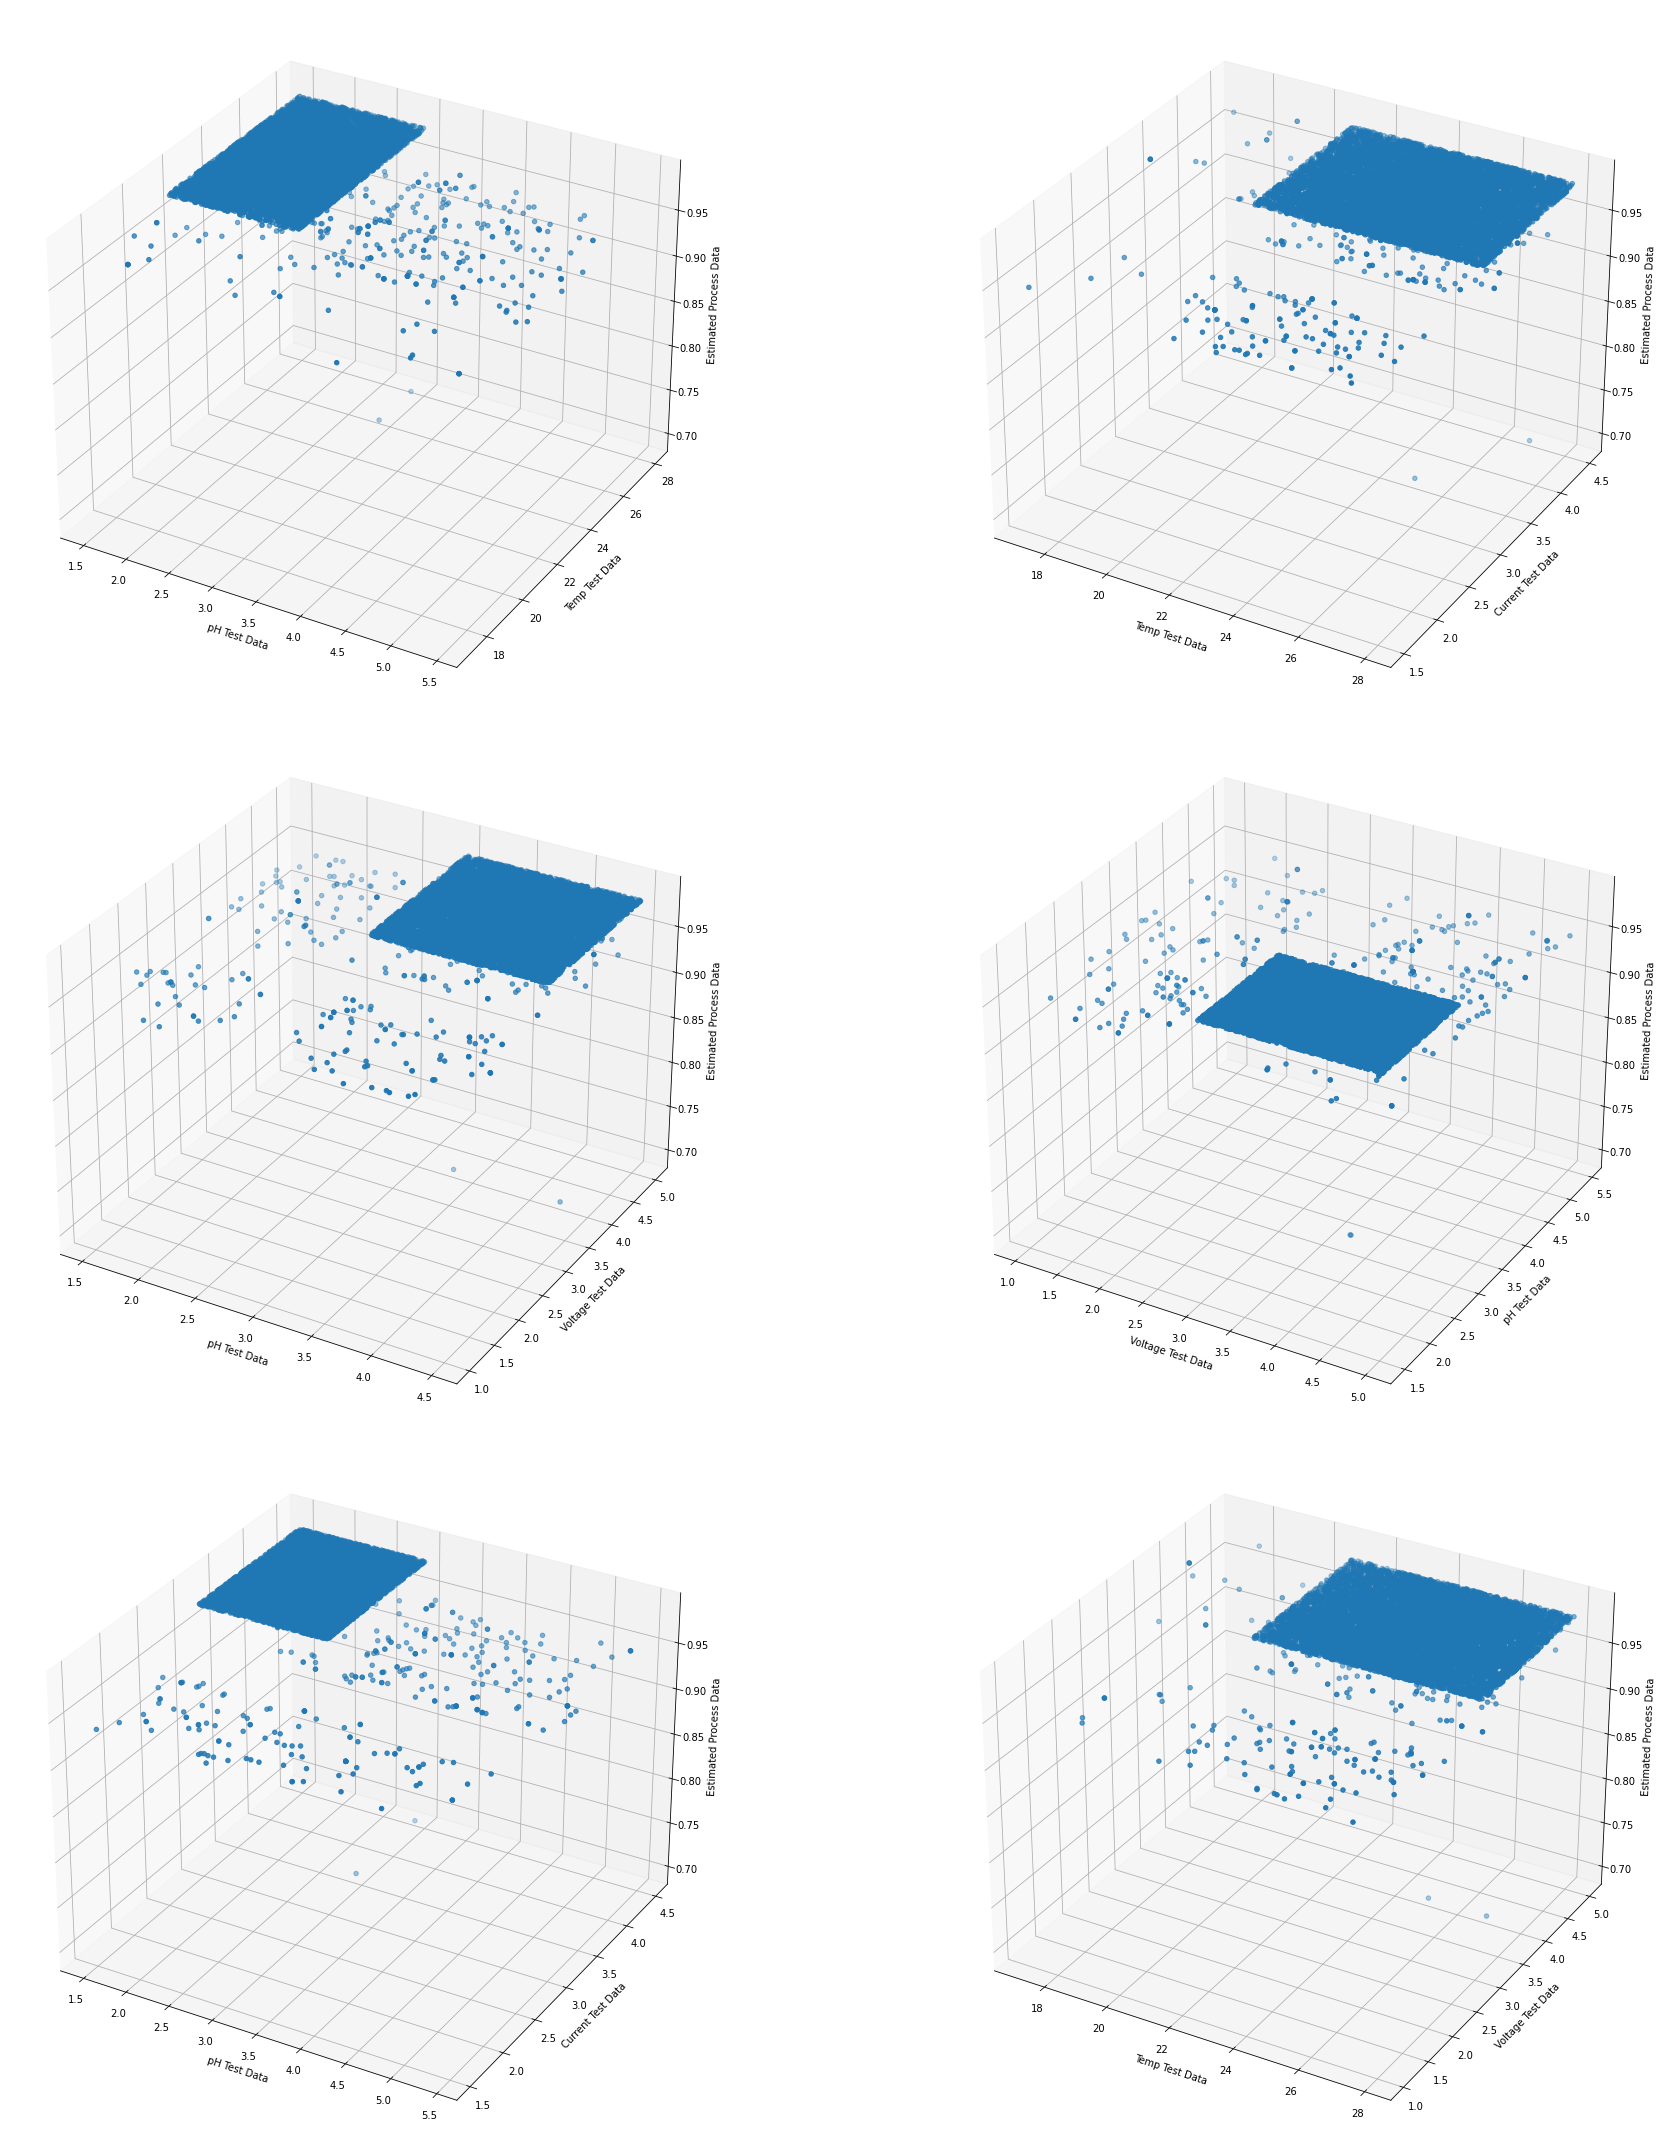

In [223]:
fig = plt.figure(figsize=(30, 30))
ax1 = fig.add_subplot(3,2,1, projection='3d')
ax1.scatter(test_data['pH'], test_data['Temp'], predicted_data)
ax1.set_xlabel('pH Test Data')
ax1.set_ylabel('Temp Test Data')
ax1.set_zlabel('Estimated Process Data')
ax2 = fig.add_subplot(3,2,2, projection='3d')
ax2.scatter(test_data['Temp'], test_data['Current'], predicted_data)
ax2.set_xlabel('Temp Test Data')
ax2.set_ylabel('Current Test Data')
ax2.set_zlabel('Estimated Process Data')
ax3 = fig.add_subplot(3,2,3, projection='3d')
ax3.scatter(test_data['Current'], test_data['Voltage'], predicted_data)
ax3.set_xlabel('pH Test Data')
ax3.set_ylabel('Voltage Test Data')
ax3.set_zlabel('Estimated Process Data')
ax4 = fig.add_subplot(3,2,4, projection='3d')
ax4.scatter(test_data['Voltage'], test_data['pH'], predicted_data)
ax4.set_xlabel('Voltage Test Data')
ax4.set_ylabel('pH Test Data')
ax4.set_zlabel('Estimated Process Data')
ax5 = fig.add_subplot(3,2,5, projection='3d')
ax5.scatter(test_data['pH'], test_data['Current'], predicted_data)
ax5.set_xlabel('pH Test Data')
ax5.set_ylabel('Current Test Data')
ax5.set_zlabel('Estimated Process Data')
ax6 = fig.add_subplot(3,2,6, projection='3d')
ax6.scatter(test_data['Temp'], test_data['Voltage'], predicted_data)
ax6.set_xlabel('Temp Test Data')
ax6.set_ylabel('Voltage Test Data')
ax6.set_zlabel('Estimated Process Data')
plt.tight_layout()
plt.show()

### Decision Tree 시각화

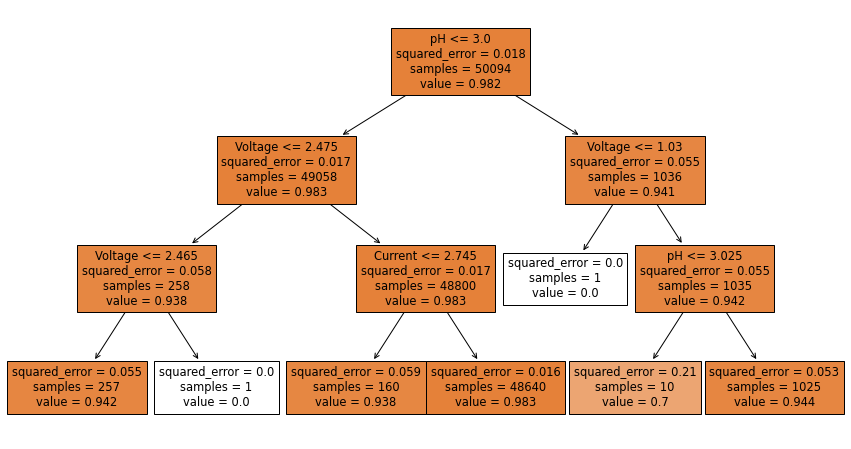

In [244]:
fig = plt.figure(figsize=(15, 8))
_ = tree.plot_tree(clf, 
                  feature_names=['pH','Temp','Current', 'Voltage'],
                  class_names=['0', '1'],
                  filled=True)

### Decision Tree VI(Variable Importance)

1. pH
2. Voltage
3. Current
4. Temp

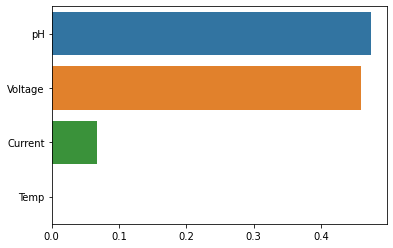

In [367]:
fi1 = pd.Series(clf.feature_importances_, index= train_data[['pH','Temp','Current','Voltage']].columns).sort_values(ascending=False)

sns.barplot(x=fi1, y=fi1.index)
plt.show()

### RandomForest 모델 학습

In [342]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='entropy', max_depth=3, random_state = 125)
rf.fit(train_data[['pH','Temp','Current','Voltage']], train_data[['QC']])

<ipython-input-342-b55fddf43e32>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_data[['pH','Temp','Current','Voltage']], train_data[['QC']])


RandomForestClassifier(criterion='entropy', max_depth=3, random_state=125)

In [343]:
predicted_data = rf.predict(test_data[['pH','Temp','Current','Voltage']])
print('Random forest Model Predict : ', predicted_data)
rmse = sqrt(mean_squared_error(test_data['QC'], predicted_data))
print('Random forest Model RMSE : ',rmse)

Random forest Model Predict :  [1 1 1 ... 1 1 1]
Random forest Model RMSE :  0.13915175134071342


In [344]:
y_test = test_data['QC'].values
print("accuracy = ", accuracy_score(y_test, predicted_data))
print("recall = ", recall_score(y_test, predicted_data))
print("precision = ", precision_score(y_test, predicted_data))
print("f1 score = ", f1_score(y_test, predicted_data))

print("=" * 80)
print(confusion_matrix(y_test, predicted_data))

accuracy =  0.9806367900988122
recall =  1.0
precision =  0.9806367900988122
f1 score =  0.9902237452126588
[[   0  194]
 [   0 9825]]


### RandomForest VI(Variable Importance)

1. pH
2. Voltage
3. Temp
4. Current

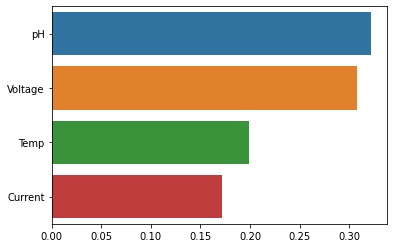

In [345]:
fi2 = pd.Series(rf.feature_importances_, index= train_data[['pH','Temp','Current','Voltage']].columns).sort_values(ascending=False)

sns.barplot(x=fi2, y=fi2.index)
plt.show()

### XGBoost 모델 학습

In [362]:
from xgboost import plot_importance
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 500, learning_rate = 0.1, random_state = 4)
xgb.fit(train_data[['pH','Temp','Current','Voltage']], train_data[['QC']])

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=4,
              reg_alpha=0, reg_lambda=1, ...)

In [363]:
predicted_data2 = xgb.predict(test_data[['pH','Temp','Current','Voltage']])
print('XGBoost Model Predict : ', predicted_data2)
rmse = sqrt(mean_squared_error(test_data['QC'], predicted_data2))
print('XGBoost Model RMSE : ',rmse)

XGBoost Model Predict :  [1 1 1 ... 1 1 1]
XGBoost Model RMSE :  0.1395099288993552


In [364]:
y_test = test_data['QC'].values
print("accuracy = ", accuracy_score(y_test, predicted_data2))
print("recall = ", recall_score(y_test, predicted_data2))
print("precision = ", precision_score(y_test, predicted_data2))
print("f1 score = ", f1_score(y_test, predicted_data2))

print("=" * 80)
print(confusion_matrix(y_test, predicted_data2))

accuracy =  0.9805369797384968
recall =  0.9998982188295166
precision =  0.9806348572569376
f1 score =  0.990172856926876
[[   0  194]
 [   1 9824]]


### XGB VI(Variable Importance)

1. Temp
2. pH
3. Voltage
4. Current

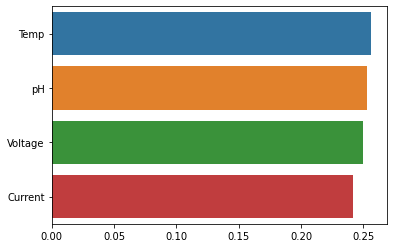

In [366]:
fi3 = pd.Series(xgb.feature_importances_, index= train_data[['pH','Temp','Current','Voltage']].columns).sort_values(ascending=False)

sns.barplot(x=fi3, y=fi3.index)
plt.show()